In [1]:
import pandas as pd
import seaborn as sn
import numpy as np
import warnings
warnings.filterwarnings('ignore')



In [2]:
df=pd.read_csv("Advertising.csv")
df

,SNo.,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


here there are 200 rows and 5 columns.

it is a regression problem as our output 'sale' has continuous data.

all rows and columns has continuous data.

will drop sno. as it has no contribution in the output.

In [3]:
df.columns

Index(['SNo.', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

above are the column names of the dataframe.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SNo.       200 non-null    int64  
 1   TV         200 non-null    float64
 2   radio      200 non-null    float64
 3   newspaper  200 non-null    float64
 4   sales      200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


there are no null values present in the dataset. datatype of all the columns are float excepr sno.

In [5]:
df.shape

(200, 5)

200 rows 5 columns

In [7]:
df.drop('SNo.',axis=1,inplace=True)

dropped the SNo. column

In [8]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


in newspaper column mean is higher than median. the distribution is skewed. outliers might be present as the difference between 75% and max value is high.

<AxesSubplot:xlabel='TV', ylabel='Density'>

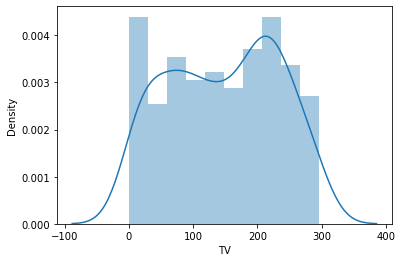

In [24]:
sn.distplot(df['TV'],bins=10)

not a proper normal distribution, its skewed.

<AxesSubplot:xlabel='radio', ylabel='Density'>

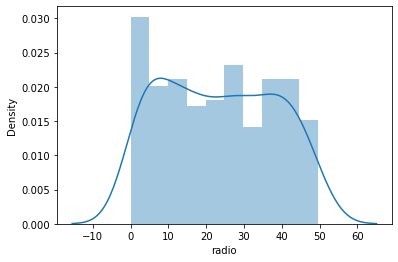

In [11]:
sn.distplot(df['radio'],bins=10)

not a proper normal distribution, its skewed.

<AxesSubplot:xlabel='newspaper', ylabel='Density'>

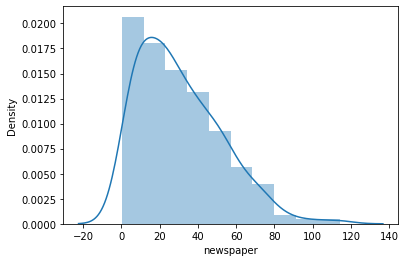

In [12]:
sn.distplot(df['newspaper'],bins=10)

not a proper normal distribution, its skewed.

<AxesSubplot:>

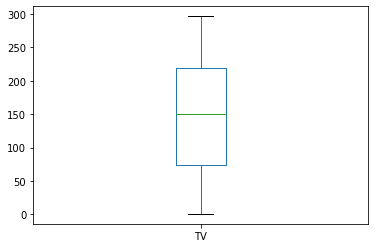

In [13]:
df['TV'].plot.box()

no outliers present

<AxesSubplot:>

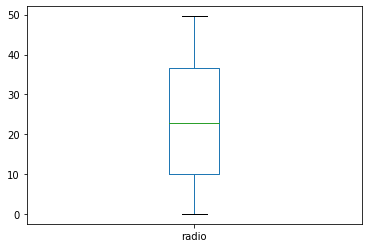

In [14]:
df['radio'].plot.box()

no outliers present

<AxesSubplot:>

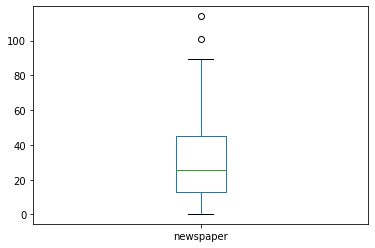

In [15]:
df['newspaper'].plot.box()

outliers present

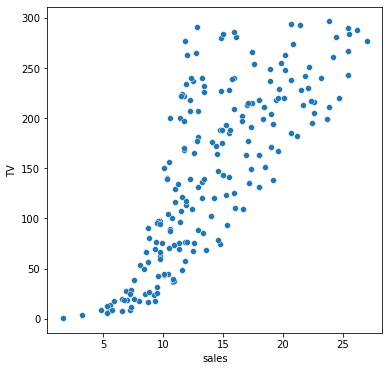

In [25]:
import matplotlib.pyplot as plt
plt.figure(figsize=[6,6])
sn.scatterplot(df['sales'],df['TV']);

the graph looks more in a increasing side, positive relation with sales.

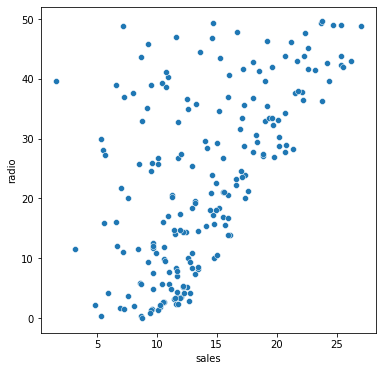

In [26]:
plt.figure(figsize=[6,6])
sn.scatterplot(df['sales'],df['radio']);

the graph looks more scattered, still in a positive side.

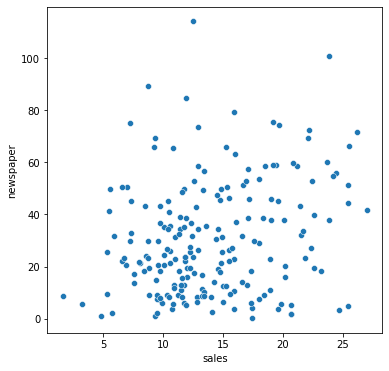

In [27]:
plt.figure(figsize=[6,6])
sn.scatterplot(df['sales'],df['newspaper']);

the graph is extremely scattered, cant predict whether its a positive relation or not.

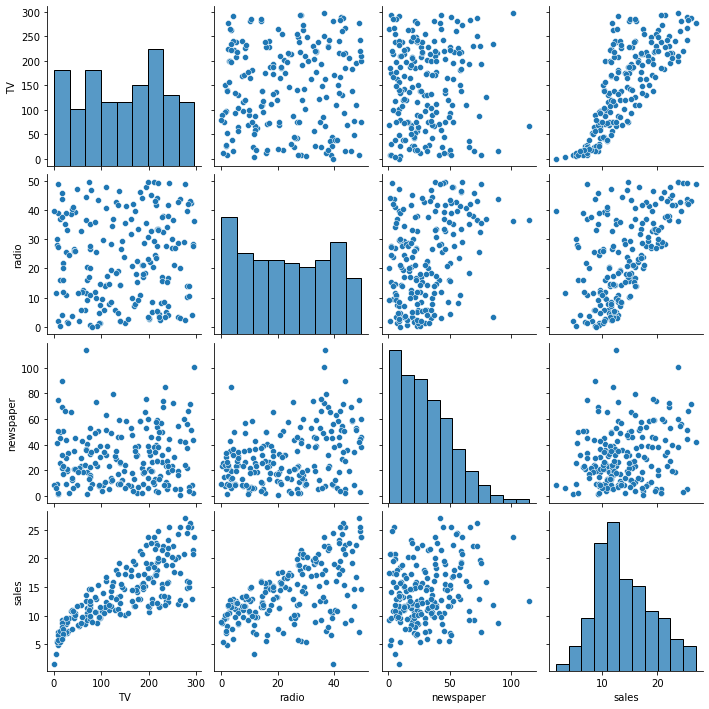

In [19]:
sn.pairplot(df)

from the above graph we can see tv has the most positive relation, it increases the sale, then radio and then the newspaper.

In [20]:
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

there are no null values present.

In [7]:
df.skew()

TV          -0.069853
radio        0.094175
newspaper    0.894720
sales        0.407571
dtype: float64

skewness is present in newspaper, its out of the range of +/-0.5

In [8]:
cor=df.corr()

<AxesSubplot:>

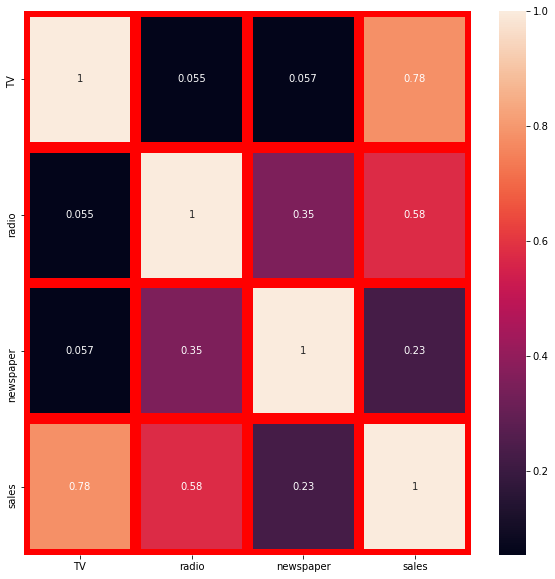

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=[10,10])
sn.heatmap(cor,annot=True,linewidth=10,linecolor='r')

all the columns have positive correlation with sales.

TV              AxesSubplot(0.125,0.125;0.168478x0.755)
radio        AxesSubplot(0.327174,0.125;0.168478x0.755)
newspaper    AxesSubplot(0.529348,0.125;0.168478x0.755)
sales        AxesSubplot(0.731522,0.125;0.168478x0.755)
dtype: object

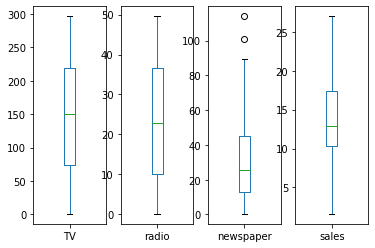

In [10]:
df.plot(kind='box',subplots=True,layout=(1,4))

outliers present only in newspaper

In [11]:
import numpy as np
from scipy.stats import zscore
z=np.abs(zscore(df))
df_new=df[(z<3).all(axis=1)]

In [12]:
df_new.shape

(198, 4)

In [13]:
df.shape

(200, 4)

In [14]:
Data_loss=((200-198)/200)*100
Data_loss

1.0

outliers are removed with just 1% data loss.

In [16]:
df_new.skew()

TV          -0.082332
radio        0.114842
newspaper    0.650112
sales        0.407130
dtype: float64

skewness is present in newspaper column

In [17]:
df_new['newspaper'] = np.sqrt(df_new['newspaper'])

removed skewness from newspaper

In [18]:
df_new.skew()

TV          -0.082332
radio        0.114842
newspaper   -0.040649
sales        0.407130
dtype: float64

In [23]:
x=df_new.iloc[:,0:-1]
y=df_new.iloc[:,-1]

divided the x and y columns for train test split

In [24]:
x

,TV,radio,newspaper
0,230.1,37.8,8.318654
1,44.5,39.3,6.715653
2,17.2,45.9,8.324662
3,151.5,41.3,7.648529
4,180.8,10.8,7.641989
...,...,...,...
195,38.2,3.7,3.714835
196,94.2,4.9,2.846050
197,177.0,9.3,2.529822
198,283.6,42.0,8.136338


In [25]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=scaler.fit_transform(x)

scaled the x columns

In [26]:
x=pd.DataFrame(x)
x

,0,1,2
0,0.978697,0.989521,1.636691
1,-1.199012,1.090705,0.824808
2,-1.519332,1.535913,1.639734
3,0.056456,1.225616,1.297288
4,0.400243,-0.831784,1.293976
...,...,...,...
193,-1.272932,-1.310720,-0.695037
194,-0.615864,-1.229773,-1.135057
195,0.355657,-0.932968,-1.295219
196,1.606431,1.272836,1.544352


In [27]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 198, dtype: float64

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [30]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=i)
    lm=DecisionTreeRegressor()
    lm.fit(x_train,y_train)
    pred=lm.predict(x_test)
    accu=r2_score(y_test,pred)
    if accu>maxAccu:
        maxAccu=accu
        maxRS=i
print("best accuracy is",maxAccu,"on random state",maxRS)

best accuracy is 0.9741309162894127 on random state 21


In [31]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=21)

In [32]:
model=[DecisionTreeRegressor(),SVR(),LinearRegression(),KNeighborsRegressor()]
for a in model:
    a.fit(x_train,y_train)
    a.score(x_train,y_train)
    predm=a.predict(x_test)
    print('R2 score of' ,a, 'is:')
    print(r2_score(y_test,predm))
    print('error:')
    print('Mean absolute error:',mean_absolute_error(y_test,predm))
    print('mean squared error:',mean_squared_error(y_test,predm))
    print('root Mean Squared Error: ',np.sqrt(mean_squared_error(y_test,predm)))
    print('\n')

R2 score of DecisionTreeRegressor() is:
0.9712367077878826
error:
Mean absolute error: 0.7272727272727274
mean squared error: 0.7800000000000002
root Mean Squared Error:  0.8831760866327848


R2 score of SVR() is:
0.9196565804883096
error:
Mean absolute error: 0.9854613234237105
mean squared error: 2.1787445872666114
root Mean Squared Error:  1.4760571084028598


R2 score of LinearRegression() is:
0.9116453253132755
error:
Mean absolute error: 1.247733416584981
mean squared error: 2.395992981172444
root Mean Squared Error:  1.5478995384625076


R2 score of KNeighborsRegressor() is:
0.9542569787605663
error:
Mean absolute error: 0.8706060606060606
mean squared error: 1.2404545454545453
root Mean Squared Error:  1.113756950799655




In [33]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(DecisionTreeRegressor(),x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.95449905 0.95515618 0.93727812 0.92450149 0.96361863]
0.9470106939112723
0.014139556752871856


In [34]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(SVR(),x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.89081057 0.94241963 0.96199015 0.80585953 0.91950516]
0.9041170072126675
0.054561488010583054


In [35]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(LinearRegression(),x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.87927341 0.91751522 0.92568478 0.81065809 0.89557158]
0.8857406146589945
0.04094147025753493


In [36]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(KNeighborsRegressor(),x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.94412733 0.95671675 0.95845528 0.87260099 0.94712163]
0.9358043941034188
0.03206995726981771


after seeing the model performance and cross val score the least difference and  best model is SVR

In [37]:
from sklearn.model_selection import GridSearchCV
import numpy as np

In [42]:
parameter={'kernel':['linear','poly','sigmoid','rbf'],
         'gamma':['scale','auto'],
          'degree':np.arange(0,5),
          'C':np.arange(0,5)}

In [44]:
GCV=GridSearchCV(SVR(),parameter,cv=5,verbose=True,n_jobs=-1)#verbose and n_jobs I used because my svr was not working as it had too many fits.

In [45]:
GCV.fit(x_train,y_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


GridSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
             param_grid={'C': array([0, 1, 2, 3, 4]),
                         'degree': array([0, 1, 2, 3, 4]),
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'sigmoid', 'rbf']},
             verbose=True)

In [46]:
GCV.best_params_

{'C': 4, 'degree': 0, 'gamma': 'auto', 'kernel': 'rbf'}

In [47]:
sale_mod=SVR(C=4,gamma='auto',kernel='rbf',degree=0)
sale_mod.fit(x_train,y_train)
pred=sale_mod.predict(x_test)
acc=r2_score(y_test,pred)
print(acc*100)

97.3158888985541


after the hyperparameter tuning  the model is giving 97.31% r2_score.

In [48]:
import joblib
joblib.dump(sale_mod,"salesmodel.pkl")

['salesmodel.pkl']

saving the model